In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import re
from utils.preprocessing import pre_process_seer


import utils.train_script

df_train = pd.read_csv('xai_train_data.csv')
df_test  = pd.read_csv('xai_test_data.csv')

<frozen importlib._bootstrap>:219: RuntimeWarning: sklearn.tree._splitter.Splitter size changed, may indicate binary incompatibility. Expected 360 from C header, got 1160 from PyObject


In [12]:
df_train['Vital status recode (study cutoff used)'].min()

'Alive'

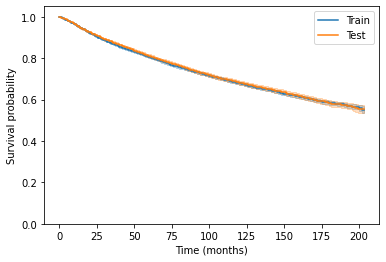

In [34]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Create Kaplan-Meier fitter objects
kmf_train = KaplanMeierFitter()
kmf_test = KaplanMeierFitter()

# Fit the Kaplan-Meier curves for the train and test dataframes

time_train = df_train['Survival months']
event_train = [0 if x=='Alive' else 1 for x in df_train['Vital status recode (study cutoff used)']]

kmf_train.fit(time_train, event_observed=event_train, label='Train')

mask_test = (df_test['Survival months']*30 <=200)

time_test = df_test['Survival months']
event_test = [0 if x=='Alive' else 1 for x in df_test['Vital status recode (study cutoff used)']]

kmf_test.fit(time_test, event_observed=event_test, label='Test')

# Plot the Kaplan-Meier curves together
ax = kmf_train.plot(ci_show=True)
kmf_test.plot(ax=ax, ci_show=True)
ax.set_xlabel('Time (months)')
ax.set_ylabel('Survival probability')
ax.set_ylim([0, 1.05])  # Set y-axis limits
plt.show()


In [27]:
df_train.shape

(24450, 23)

In [35]:
a,b,c,d = obtain_data_cval(dl=True)
c[1].to_csv('test_data_preprocess.csv', index=False)
c[0].to_csv('train_data_preprocess.csv', index=False)

d[1].to_csv('test_label_preprocess.csv', index=False)
d[0].to_csv('train_label_preprocess.csv', index=False)


/home/carlos.hernandez/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/carlos.hernandez/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/carlos.hernandez/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

AttributeError: 'tuple' object has no attribute 'to_csv'

In [6]:
for data, labels in zip(a,b):
    print(train_script.use_ml_models(data, labels, None, 'rsf'))
    

(0.7933671753844228, 0.1222601182785644)
(0.7946310336495963, 0.12528148985082263)
(0.7906909374303737, 0.12686504950746766)


In [11]:
b[0][0][:5]

array([(False, 114.), (False, 171.), ( True,  63.), (False, 103.),
       ( True,  37.)], dtype=[('event', '?'), ('Survival months', '<f8')])

In [19]:
#train_script.use_ml_models([a,b], [c,d], None, 'gbt')
cindex, brier, log = train_script.use_dl([a,b], [c,d], None)
cindex

0:	[0s / 0s],		train_loss: 6.1629,	val_loss: 8.7055
1:	[0s / 0s],		train_loss: 6.0829,	val_loss: 8.6367
2:	[0s / 0s],		train_loss: 6.0168,	val_loss: 8.5849
3:	[0s / 0s],		train_loss: 5.9865,	val_loss: 8.5387
4:	[0s / 0s],		train_loss: 5.9580,	val_loss: 8.5062
5:	[0s / 1s],		train_loss: 5.9000,	val_loss: 8.4741
6:	[0s / 1s],		train_loss: 5.8651,	val_loss: 8.4430
7:	[0s / 1s],		train_loss: 5.8401,	val_loss: 8.4192
8:	[0s / 1s],		train_loss: 5.8125,	val_loss: 8.3946
9:	[0s / 1s],		train_loss: 5.7851,	val_loss: 8.3717
10:	[0s / 1s],		train_loss: 5.7935,	val_loss: 8.3548
11:	[0s / 1s],		train_loss: 5.7457,	val_loss: 8.3328
12:	[0s / 2s],		train_loss: 5.7489,	val_loss: 8.3217
13:	[0s / 2s],		train_loss: 5.7095,	val_loss: 8.3070
14:	[0s / 2s],		train_loss: 5.7180,	val_loss: 8.2952
15:	[0s / 2s],		train_loss: 5.6831,	val_loss: 8.2776
16:	[0s / 2s],		train_loss: 5.6720,	val_loss: 8.2656
17:	[0s / 2s],		train_loss: 5.6602,	val_loss: 8.2607
18:	[0s / 3s],		train_loss: 5.6514,	val_loss: 8.2449
19:

0.7967862894705318

In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

df_train['event'] = [False if x=='Alive' else True for x in df_train['Vital status recode (study cutoff used)']]
df_test['event'] = [False if x=='Alive' else True for x in df_test['Vital status recode (study cutoff used)']]

y_train = Surv.from_dataframe('event','Survival months', df_train)
y_test = Surv.from_dataframe('event','Survival months', df_test)


# fit the Cox model
cox = CoxPHSurvivalAnalysis(alpha=0.00001, n_iter=100000)
model = RandomSurvivalForest(n_estimators=100)
model.fit(df_train_pre, y_train)

In [11]:
y_train


array([(False, 114.), (False, 171.), ( True,  63.), ..., (False, 117.),
       (False, 125.), (False,  94.)],
      dtype=[('event', '?'), ('Survival months', '<f8')])

### OLD

In [73]:
categorical_cols = []
categories = []

### Age - TODO divide into three total groups
df['Age_int'] = [int(x[:2]) for x in df['Age recode with single ages and 90+']]
df['Age_coded'] = [2 if x>=65 else 1 if (x<65) and (x>=45) else 0 for x in df['Age_int']]

### Tumor size
df['Tumor_size_coded'] = df['CS tumor size (2004-2015)'].apply(lambda x: np.log(x+10e-6))

### Tumor extension -> Coded as OHE |||| MAYBE try it out as continuous variable
tumor_ext_values = [100, 330, 400, 200, 300, 310, 500, 315, 350, 355, 375, 320, 340,
       360, 380, 800, 335, 370, 950]

df['CS extension (2004-2015)_coded'] = df['CS extension (2004-2015)']
#tumor_ext_values_str = [str(x) for x in tumor_ext_values]
#df['CS extension (2004-2015)'] = df['CS extension (2004-2015)'].astype(str)
#categories.append(tumor_ext_values_str)
#categorical_cols.append('CS extension (2004-2015)')

### RX Summ--Surg Prim Site (1998+) -> convert to int
df['Prim_site_coded'] = df['RX Summ--Surg Prim Site (1998+)'].astype(int)

### Sex binary variable
df['Sex_coded'] = [1 if x=='Female' else 0 for x in df['Sex']]

### Race -> Categorical variable
# define the mapping of old to new values
race_mapping = {
    'White': 'White',
    'Black': 'Other',
    'Other (American Indian/AK Native, Asian/Pacific Islander)': 'Other',
    'Unknown': 'Other'
}

df['Race_coded'] = [1 if x=='White' else 0 for x in df['Race recode (White, Black, Other)']]


### Marital status -> OHE TBD how to combine them
marital_mapping = {
    'Married (including common law)': 'Married',
    'Widowed': 'Married',
    'Unmarried or Domestic Partner': 'Married',
    'Single (never married)': 'Single',
    'Unknown': 'Other',
    'Divorced': 'Other',
    'Separated': 'Other'
}

df['Marital_mapped'] = df['Marital status at diagnosis'].replace(marital_mapping)
marital_values = ['Single', 'Married', 'Other']

categories.append(marital_values)
categorical_cols.append('Marital_mapped')

### Primary Site - labeled -> OHE with the classes being HF, trunk and limbs
primary_site_mapping = { 
    'C44.0-Skin of lip, NOS': 'HF',
    'C44.1-Eyelid': 'HF',
    'C44.2-External ear': 'HF',
    'C44.3-Skin other/unspec parts of face': 'HF',
    'C44.4-Skin of scalp and neck': 'HF',
    
    'C44.5-Skin of trunk': 'Trunk',
    
    'C44.6-Skin of upper limb and shoulder': 'Limbs',
    'C44.7-Skin of lower limb and hip': 'Limbs',
    'C44.8-Overlapping lesion of skin': 'Limbs',
    'C44.9-Skin, NOS': 'Limbs'
}


df['Primary_Site_enc'] = df['Primary Site - labeled'].replace(primary_site_mapping)
primary_site_values = ['HF', 'Limbs', 'Trunk']
categories.append(primary_site_values)
categorical_cols.append('Primary_Site_enc')

In [74]:
### TNM -> OHE
# T
t_values = ['T1a', 'T2a',  'T1NOS', 'T2b', 'T1b', 'T3b', 'T3a', 'TX', 'T4b',
       'T4a', 'T2NOS', 'T4NOS', 'T3NOS']
# regular expression pattern to extract T1-T4 and TX
pattern = r'^T[0-4X]{1}'

# extract the required values using regex
df['Derived AJCC T, 6th ed (2004-2015)'] = [re.match(pattern, value).group(0) for value in df['Derived AJCC T, 6th ed (2004-2015)']]
t_values = ['T0', 'T1', 'T2', 'T3', 'TX', 'T4']

categories.append(t_values)
categorical_cols.append('Derived AJCC T, 6th ed (2004-2015)')

# N --- TODO N0 is 0 and the rest is 1
n_map = {'N0' : 'N0', 'N1a': 'N1', 'N1b': 'N1', 'N1NOS': 'N1', 'N2a': 'N2', 'N2b': 'N2', 'N2c': 'N2', 'N2NOS': 'N2', 'NX' :'NX', 'N3' : 'N3'}
df['N_enc'] = df['Derived AJCC N, 6th ed (2004-2015)'].replace(n_map)

n_values = df['N_enc'].unique()

categories.append(n_values)
categorical_cols.append('N_enc')
#df['N_coded'] = [0 if x=='N0' else 1 for x in df['Derived AJCC N, 6th ed (2004-2015)']]


# M TODO M0 is 0 and the rest is 1
m_map = {
    'MX': 'MX',
    'M0': 'M0',
    'M1a': 'M1',
    'M1b': 'M1',
    'M1c': 'M1',
    'M1NOS': 'M1'
}

df['M_enc'] = df['Derived AJCC M, 6th ed (2004-2015)'].replace(m_map)

m_values = df['M_enc'].unique()

categories.append(m_values)
categorical_cols.append('M_enc')
#df['M_coded'] = [ if x=='M0' else 1 if x=='MX' else 2 for x in df['Derived AJCC M, 6th ed (2004-2015)']]

In [75]:
n_values

array(['N0', 'N1', 'NX', 'N3', 'N2'], dtype=object)

In [76]:
### Summary stage 2000 (1998-2017) -> Ordinal variable or OHE
#summary_values = df['Summary stage 2000 (1998-2017)'].unique()

#categories.append(summary_values)
#categorical_cols.append('Summary stage 2000 (1998-2017)')
df['Summary_stage_coded'] = [0 if x=='Localized' else 1 if x=='Regional' else 2 for x in df['Summary stage 2000 (1998-2017)']]

### Radiation recode -> binary variable
# create a dictionary of values to be replaced with 1

set_as_0 = ['None/Unknown',  'Refused (1988+)', 'Recommended, unknown if administered']
df['Radiation_coded'] = [0 if x in set_as_0 else 1 for x in df['Radiation recode']]

### Chemotherapy recode (yes, no/unk) -> Binary
df['Chemotherapy_coded'] = [1 if x.lower()=='yes' else 0 for x in df['Chemotherapy recode (yes, no/unk)']]

### RX Summ--Scope Reg LN Sur (2003+) -> None and Unknown or not applicable as NO and the rest YES
df['Scope_Reg_coded'] = [0 if x in ['None', 'Unknown or not applicable'] else 1 for x in df['RX Summ--Scope Reg LN Sur (2003+)']]
                                       
### RX Summ--Surg/Rad Seq -> No rad... as NO the rest YES
df['Surg/Rad_coded'] = [0 if x=='No radiation and/or cancer-directed surgery' else 1 for x in df['RX Summ--Surg/Rad Seq']]

### Median household income inflation adj to 2021 -> Two to three categories OHE
# define a function to map income to categories
def income_categories(income):
    if income.startswith('$75,000+'):
        return 2
    elif income.startswith('$65,000') or income.startswith('$70,000'):
        return 1
    else:
        return 0

# apply the function to the income column and create a new column for the categories
df['Income_coded'] = df['Median household income inflation adj to 2021'].apply(income_categories)

In [77]:
# instantiate the ColumnTransformer object
ct = ColumnTransformer([
        ("encoder", OneHotEncoder(categories=categories, drop='first'), categorical_cols)
    ], remainder="drop")

all_but_first = [x[1:] for x in categories]
flat_list = [element for sublist in all_but_first for element in sublist]

# fit the ColumnTransformer to the data and transform it
# fit the ColumnTransformer to the data and transform it
transformed_data = ct.fit_transform(df)
transformed_df = pd.DataFrame(data=transformed_data.toarray(), columns=flat_list)

# assign transformed columns to original DataFrame
df.loc[:, transformed_df.columns] = transformed_df

In [78]:
# get columns that end with '_coded'
coded_cols = [col for col in df.columns if col.endswith('_coded')]

# get columns from categorical_variables list
for sublist in categories:
    for col in sublist:
        if col not in coded_cols and col not in ['Single', 'T0', 'HF', '100', 'M0', 'N0']:
            coded_cols.append(col)


In [79]:
from sklearn.preprocessing import StandardScaler, RobustScaler


df_train = df[coded_cols]


# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_train)

# convert the numpy array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_train.columns)
df_train.columns

Index(['Age_coded', 'Tumor_size_coded', 'Prim_site_coded', 'Sex_coded',
       'Race_coded', 'Summary_stage_coded', 'Radiation_coded',
       'Chemotherapy_coded', 'Scope_Reg_coded', 'Surg/Rad_coded',
       'Income_coded', 'CS extension (2004-2015)_coded', 'Married', 'Other',
       'Limbs', 'Trunk', 'T1', 'T2', 'T3', 'TX', 'T4', 'N1', 'NX', 'N3', 'N2',
       'MX', 'M1'],
      dtype='object')

In [82]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

df['event'] = [False if x=='Alive' else True for x in df['Vital status recode (study cutoff used)']]

y = Surv.from_dataframe('event','Survival months', df)

# fit the Cox model
cox = CoxPHSurvivalAnalysis(alpha=0.00001, n_iter=100000)
model = RandomSurvivalForest(n_estimators=400)
model.fit(scaled_data, y)
model.score(scaled_data, y)

0.8647278699673984

In [84]:
from sksurv.metrics import concordance_index_censored
preds = model.predict(scaled_data)
c_index_train = concordance_index_censored(
            df['event'], df['Survival months'], preds
        )[0]
c_index_train

0.8647278699673984

In [52]:
scaled_df

,Age_coded,Tumor_size_coded,Prim_site_coded,Sex_coded,Chemotherapy_coded,SLNB_Scope_coded,Income_coded,330,400,200,...,N2NOS,N1,N2,MX,M1c,M1b,M1a,M1NOS,Regional,Distant
0,1.182840,0.479511,1.201734,-0.834585,0.0,1.444907,0.899092,10.636989,-0.396220,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
1,-0.113261,-0.091052,-1.087113,-0.834585,0.0,-0.692086,0.899092,-0.094012,-0.396220,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
2,0.010177,-0.330990,1.456051,-0.834585,0.0,-0.692086,-0.315669,-0.094012,2.523848,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
3,-1.100767,-1.076304,-0.451322,1.198200,0.0,-0.692086,0.899092,-0.094012,-0.396220,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
4,-2.335150,2.746623,-1.087113,-0.834585,0.0,-0.692086,0.899092,-0.094012,2.523848,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24308,0.257053,-0.330990,-0.705638,-0.834585,0.0,-0.692086,0.899092,-0.094012,-0.396220,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
24309,-1.471082,-0.474571,1.328893,1.198200,0.0,1.444907,-1.530430,-0.094012,-0.396220,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
24310,-2.705464,-1.385637,-0.451322,1.198200,0.0,1.444907,0.899092,-0.094012,-0.396220,2.080736,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
24311,-1.594520,-1.385637,-0.578480,-0.834585,0.0,-0.692086,0.899092,-0.094012,-0.396220,-0.480599,...,-0.04401,-0.054878,-0.012828,-0.131293,-0.084409,-0.053735,-0.057816,-0.042579,-0.312414,-0.140857
